In [139]:
import importlib

import numpy as np

import ParseING11 as parse
import check_configs as configcheck
import validLSJ


importlib.reload(parse)
importlib.reload(configcheck)
importlib.reload(validLSJ)

<module 'validLSJ' from 'c:\\Users\\brewster\\Desktop\\CUDA Cowan  redone\\validLSJ.py'>

In [140]:
# aligning the scraped data with predicitions of amounts of F, G, zeta etc 
def check(filename):
    parseddata = parse.main(filename)

    alignment = []
    # values for our 
    for key, value in parseddata[1].items():
        print("key, value pair",key, value )
        configdict = configcheck.main(key.split()[1])
        print(key, len(value), sum(configdict.values())) #Number of output values scraped, number of output values predicted
        print(key, value, configdict)
        alignment.append(len(value) == sum(configdict.values())) # list of bools for checked configurations

    return alignment

for i in range(8,9):
    filename = f"ING11_{i}.txt"
    print(filename)
    alignment = check(filename)
    print(filename, alignment, "\n\n")


ING11_8.txt
key, value pair Sn15+ 4p5 ['5675090', '5169172']
configarray:  [[4, 1, 5]]
Sn15+ 4p5 2 2
Sn15+ 4p5 ['5675090', '5169172'] {'Eav': 1, 'Fk_ii': 0, 'zeta': 1, 'Fk_ij': 0, 'Gk_ij': 0}
key, value pair Sn15+ sp4d ['111374910', '5180012', '561972', '14965694', '10706284', '13712514', '8698684']
configarray:  [[None, 0, 1], [None, 1, 1], [4, 2, 1]]
Sn15+ sp4d 7 8
Sn15+ sp4d ['111374910', '5180012', '561972', '14965694', '10706284', '13712514', '8698684'] {'Eav': 1, 'Fk_ii': 0, 'zeta': 2, 'Fk_ij': 1, 'Gk_ij': 4}
key, value pair Sn15+ spdf ['237801980', '11380271', '5201812', '54692', '10842743', '10535963', '10115783', '6674303', '14982984', '10719094', '7886014', '13728384', '8708974', '9403884', '6619944', '11697084', '7687454', '5544894']
configarray:  [[None, 0, 1], [None, 1, 1], [None, 2, 1], [None, 3, 1]]
Sn15+ spdf 18 18
Sn15+ spdf ['237801980', '11380271', '5201812', '54692', '10842743', '10535963', '10115783', '6674303', '14982984', '10719094', '7886014', '13728384', '87089

Lets continue with cases ING11_3, 5, 6, 7 since they work properly. Now that we have 

In [ ]:
from sympy.physics.wigner import wigner_3j, wigner_6j
# Example calculations
#print(wigner_3j(2, 2, 4, 0, 0, 0))  # Example Wigner 3j symbol
#print(wigner_6j(1, 2, 3, 4, 5, 6))  # Example Wigner 6j symbol

def fk(l1, l2, k):
    if k % 2 != 0:
        return 0
    elif k > min(2*l1,2*l2):
        return 0
    L = l1 + l2
    return (-1)**L*(2*l1 +1)*(2*l2 +1)*wigner_3j(l1, k ,l1, 0, 0, 0)*wigner_3j(l2, k ,l2, 0, 0, 0)*wigner_6j(l2, l1 ,L, l2, l1, k)

def gk(l1, l2, k, S):
    if k < abs(l1 - l2):
        return 0
    if k > l1 + l2:
        return 0
    L = l1 + l2
    return (-1)**S**(2*l1 +1)*(2*l2 +1)*wigner_3j(l1, k ,l2, 0, 0, 0)**2 *wigner_6j(l1, l2 ,L, l1, l2, k)


def parse_parameters(values, count_dict):
    """Split the flat value list into chunks based on count_dict."""
    parsed = {}
    idx = 0
    for key, count in count_dict.items():
        parsed[key] = [int(values[idx + i]) for i in range(count)]
        idx += count
    return parsed


#def valid_k_values_fk(l1, l2):
#    return list(range(0, 2 * min(2 * l1, 2 * l2) + 1, 2))

#def valid_k_values_gk(l1, l2):
#    start = abs(l1 - l2)
#    return list(range(start, l1 + l2 + 1, 2))

In [ ]:
# Example usage format
parseddata = parse.main("ING11_10.txt")
for val in parseddata:
    print(val)



{'Sn8+ 4p64d6': '-1350649.787', 'Sn8+ 4p54d7': '-1350045.609', 'Sn8+ 4d54f1': '-1350071.830'}
{'Sn8+ 4p64d6': ['5675090', '10656991', '7141501', '398102'], 'Sn8+ 4p54d7': ['66092880', '10673901', '7152881', '4277622', '400702', '11299903', '14357254', '8974454'], 'Sn8+ 4d54f1': ['63470830', '10737361', '7200011', '405932', '20452', '8566803', '5477733', '10242614', '6365564', '4486014']}
{'4p54d7 - 4d54f1': ['117.77515', '72.43685', '0.00005', '0.00005']}
{'Sn8+ 4p64d6 Sn8+ 4p54d7': ['1.24275(', '4P//R1//', '4D)-0.999hr', '-96'], 'Sn8+ 4p64d6 Sn8+ 4d54f1': ['1.71273(', '4D//R1//', '4F)-0.991hr', '-88']}


In [ ]:
combinedict = validLSJ.PossibleLSJ('4p54d3')
print(combinedict)
tpl = validLSJ.total_possible_LS(combinedict)
print(tpl)

{'4p5': [(0.5, 1)], '4d3': [(0.5, 1), (0.5, 2), (0.5, 3), (0.5, 4), (0.5, 5), (1.5, 1), (1.5, 3)]}
{(2.0, 4), (1.0, 2), (1.5, 4), (1.0, 4), (2.0, 3), (1.5, 3), (2.0, 2), (1.0, 3), (1.5, 2)}


looking for type 

(*sheil 4p^6 4d^m- 4p^6 4d^(m-1) 4f + 4p^5 4d^(m+1)*)

(*sheil: 2^m 1^6 3^0 - 2^(m+1) 1^5 3^0 + 2^(m-1) 1^6 3^1*)

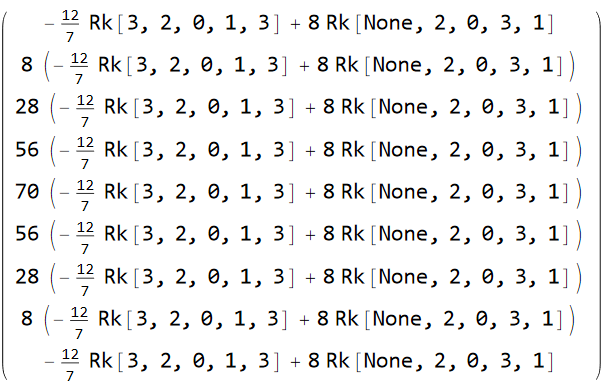

In [ ]:
#identify the RK and import them

def rdirect(l1,l2,l3,l4):
    return 0
def rexchange(l1,l2,l3,l4):
    return 1

for m in [1,8,28,56,70]:
    #call ing10 etc



    vi = m * (-12/7 * (rdirect(3,2,0,1,3)) + 8 * rexchange(0,2,0,3,1))
    